## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np

wine = datasets.load_wine() #Classification
wx_train, wx_test, wy_train, wy_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=4)
lg = LogisticRegression(penalty='l1', solver='liblinear')
#penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, 
#random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, 
#n_jobs=None, l1_ratio=None
lg.fit(wx_train, wy_train)

#print(f"size={wx_test.size}, {wy_test[:, np.newaxis, 2].size}")
wy_pred = lg.predict(wx_test)
acc = accuracy_score(wy_test, wy_pred)
print("Accuracy: ", acc)


Accuracy:  0.9722222222222222


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Mean squared error: 23.06


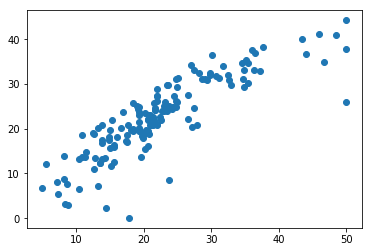

In [2]:
boston = datasets.load_boston() #Regression
print(boston.feature_names)

bx_train, bx_test, by_train, by_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=2)
#lr = LinearRegression(normalize=True)
lr = LinearRegression(normalize=False)
# fit_intercept=True, normalize=False, copy_X=True, n_jobs=None

lr.fit(bx_train, by_train)

by_pred = lr.predict(bx_test)
print("Mean squared error: %.2f" % mean_squared_error(by_test, by_pred))
plt.scatter(by_test, by_pred)